In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-04 13:54:21.280884: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 13:54:21.308493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 13:54:21.505653: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 13:54:21.508064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2563144,0786125179,Ascendant Sun (Saga of the Skolian Empire),62.95,A2SFPZ5CABWMC6,David W. Kriebel,13/13,5.0,961027200,Catherine Asaro: Writing (and Thinking) Outsid...,Male-female relations are thoroughly explored ...
2904370,B0006AV69I,New Orleans sketches,NaN,A281YN2K4M72JQ,Ryan C. Holiday,2/2,3.0,1332115200,Signs of Later Life,Faulkner moved to New Orleans in 1925 at the a...
2785877,B0008CSBW4,Experience and education (The Kappa Delta Pi l...,NaN,ADVXGHSDR0O25,Buck the Hog,6/7,5.0,1269561600,DO-WE value experience?,Here is the essential question Dewey poses in ...
1468437,B0006BYP1S,Slaughterhouse-Five,NaN,A2ZK4DSGK04KOE,Andrew Cowell,0/0,5.0,1241308800,Buy It For The Kid of the Kid You'll Have In 3...,It's quite difficult to throw a few stars and ...
2222218,B000G9WDBY,The Enchanted April (Virago Modern Classics),NaN,ANUJ9I55DD8DB,Galadrial,6/6,3.0,1213488000,Edit issue,"This is a lovely story. However, this particul..."
372127,0435126083,Wuthering Heights (New Windmill),NaN,A2UJGJAD59HQUM,Patricia Bridges,0/0,5.0,1359072000,A classic,Wuthering Heights is a Emily Bronte classic an...
1269344,1576835324,Pitch Black: Color Me Lost (True Colors Series...,10.94,A3C2RQD3XEHSQ8,C. Miley,0/0,5.0,1306627200,Pitch black,"I had heard of Melody Carlson before, but had ..."
2878630,0679729852,The Dictionary of Global Culture: What Every A...,25.00,A1KAFA2JZLRQQD,V. O. Camposeco,1/4,1.0,1262908800,Globalization from the islamic point of view,With an unnecessary long Introduction --the mo...
2974575,B000Q032UY,The Hobbit or There and Back Again,NaN,A1YXTQDQ5I290H,Josh Nicholas,0/0,5.0,1360022400,Great Book!!,Love this book!! This is a great collector's p...
2048647,B000N6R5A4,QUANTUM MECHANICS FOR CHEMISTS,NaN,A27V0S2I3M9ZOJ,Mead C. Whorton Jr.,10/10,5.0,1231891200,BASIC PRINCIPLES OF QUANTUM MECHANICS,After reading the first two chapters of Quantu...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
22288,Mommy Magic : 450 Ways to Nurture Your Child,"When a child is born, God sprinkles a little m...",['Adria Manary'],http://books.google.com/books/content?id=nGiqF...,http://books.google.com/books?id=nGiqF4PVUMYC&...,NaN,2000,http://books.google.com/books?id=nGiqF4PVUMYC&...,['Family & Relationships'],NaN
82140,Ayurveda: A Life of Balance: The Complete Guid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106414,Harold and the Purple Crayon: The Birthday Pre...,Harold uses his purple crayon to search for a ...,['Valerie Garfield'],http://books.google.com/books/content?id=hwsEA...,http://books.google.com/books?id=hwsEAAAACAAJ&...,Turtleback Books,2002-01-01,http://books.google.com/books?id=hwsEAAAACAAJ&...,['Juvenile Fiction'],NaN
73454,Tarot of an Old Gypsy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126043,The Art of Tarot (Tiny Folio),NaN,['Christina Olsen'],http://books.google.com/books/content?id=IbHBG...,http://books.google.nl/books?id=IbHBGJclG5oC&q...,NaN,1995,http://books.google.nl/books?id=IbHBGJclG5oC&d...,"['Body, Mind & Spirit']",NaN
5280,"A course of modern analysis,: An introduction ...",This classic work has been a unique resource f...,"['E. T. Whittaker', 'G. N. Watson']",http://books.google.com/books/content?id=u9ZHz...,http://books.google.nl/books?id=u9ZHzgEACAAJ&d...,Cambridge University Press,2021-08-31,http://books.google.nl/books?id=u9ZHzgEACAAJ&d...,['Mathematics'],NaN
186740,Australian Football: Steps to Success (Steps t...,"""From basic ball handling to more challenging ...","['Andrew McLeod', 'Trevor D. Jaques']",http://books.google.com/books/content?id=av8cd...,http://books.google.com/books?id=av8cdbCw2G8C&...,Human Kinetics,2006,http://books.google.com/books?id=av8cdbCw2G8C&...,['Sports & Recreation'],NaN
141591,Blaze and the lost quarry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191764,Moon Over Morocco,NaN,['Hermina Black'],NaN,http://books.google.com/books?id=xRjvngEACAAJ&...,NaN,1969,http://books.google.com/books?id=xRjvngEACAAJ&...,['Large type books'],NaN
44784,Tables and Diagrams of the Thermal Properties ...,NaN,"['Lionel Simeon Marks', 'Harvey Nathaniel Davis']",http://books.google.com/books/content?id=SicOA...,http://books.google.com/books?id=SicOAAAAYAAJ&...,NaN,1909,https://play.google.com/store/books/details?id...,['Steam'],NaN


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: Unique identifier for each user performing the review. Variable with cardinality excess. 
#   - User_id: Unique identifier for each user performing the review. Variable with cardinality excess.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.
#   - Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
#       book Title will always have the same author. So, authors feature is kept and Title is removed.    
#       This feature is removed later as it will be used to join both Datasets. 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [10]:
df_rating_processed.sample(10)

,Title,review/helpfulness,review/score,review/time,review/text
2196333,Cousin Kate,0/1,2.0,1352419200,I love almost everything written by Georgette ...
2218256,The Forsythe Saga,43/46,5.0,1041206400,"What an infinite study of character, the Forsy..."
2048855,I Can't Hear You Laughing . . . Anymore: Based...,0/0,5.0,1018483200,This story is of a woman named Elizabeth with ...
1680221,The Hobbit,1/2,5.0,1153526400,"This book really is a genius story, although, ..."
2691092,House of Mirth,1/7,2.0,1337904000,"Despite its title, this must be one of the lea..."
2198223,WCW/NWO Revenge (Prima's Official Strategy Guide),0/0,1.0,913248000,Why would ANYONE need this book? All it does i...
1531967,The Tale of the Body Thief,0/0,3.0,955065600,As in all Rice novels you must go into it with...
124430,The Two Towers,0/0,4.0,1015804800,The Two Towers is the second part to the lord ...
2595939,A Christmas Carol (Enriched Classics (Pocket)),3/3,5.0,1261526400,As Scrooge says as he wakes Christmas morning ...
2810871,Ultra Black Hair Growth II 2000 Edition,27/29,5.0,1130112000,I've been using Cathy's system for about 6 yea...


In [11]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [12]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [13]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [14]:
#CLEAN THE DATASETS

In [15]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [16]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
118847,High-Performance Ford Focus Builder's Handbook...,['Richard Holdener'],CarTech Inc,2003,['Transportation']
51426,Jumble BrainBusters!: A Workout for Your Mind ...,"['David L. Hoyt', 'Tribune Media Services', 'R...",Benchmark Press,2004-04-01,['Education']
29997,American Voices: Culture and Community,"['Dolores LaGuardia', 'Hans Paul Guth']","McGraw-Hill Humanities, Social Sciences & Worl...",2000,['College readers']
183851,Sugimoto Portraits,['Hiroshi Sugimoto'],Damiani Limited,2018-03-27,NaN
20760,Where's My Nose?,"['Susan Ring', 'Stephanie Peterson']",NaN,2001,['Juvenile Fiction']


In [17]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [18]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [19]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [20]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
204907,Elvis: The Golden Anniversary Tribute,['Richard Peters'],Salem House Publishers,['Singers'],1984
188418,The Business Valuation Book (With CD-ROM),['Trugman'],John Wiley & Sons,['Business & Economics'],2018
130034,"Ten Cate's Oral Histology: Development, Struct...",['Antonio Nanci'],Elsevier India,NaN,2012
197154,Jeremy Poldark,['Winston Graham'],"Sourcebooks, Inc.",['Fiction'],2015
203297,The Impact of Awakening: Excerpts From the Tea...,NaN,NaN,NaN,2013
112547,STORM WARNING,['Linda Sue Park'],Scholastic Inc.,['Juvenile Fiction'],2010
4433,Cordon of Steel: The US Navy and the Cuban Mis...,['Curtis A. Utz'],Naval Historical Center,['History'],1993
93903,Light and Glory,"['Peter Marshall', 'David Manuel']",Fleming H Revell Company,['Religion'],1977
13546,Searchlight Nevada,['Ralph Vitale'],Northwest Pub,['Prostitution'],1995
114436,"Julie Taymor, Playing with Fire: Theater, Oper...","['Eileen Blumenthal', 'Julie Taymor']",Harry N Abrams Incorporated,['Performing Arts'],1999


In [21]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [22]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [23]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [24]:
df_rating_processed.sample(5)

,title,helpfulness,review,review_time,text
1572261,Assassin's Apprentice,0/0,5.0,1271376000,I've only recently begun to read fiction and f...
1786797,Return to Mars (Bookcassette(r) Edition),4/4,5.0,959731200,Jamie Waterman gets a chance to go back to the...
1536006,Cold Mountain A Novel,0/0,5.0,885254400,I grew up in the area where this story takes p...
621543,KILLER SMILE,0/0,4.0,1336003200,Mary is a blonde bombshell lawyer with the car...
834147,Triumph of Hope : From Theresienstadt and Ausc...,1/1,5.0,1091664000,I finished reading Triumph of Hope this mornin...


In [25]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [26]:
df_rating_processed.sample(10)

,title,helpfulness,review,text,review_year
1962620,Wuthering Heights (College classics in English),0/0,5.0,As with most people interested in classic lite...,2011
1888246,The everlasting man (A Doubleday Image book),24/25,1.0,"While Chesterton is truly a monumental figure,...",2009
2689113,"Thailand Handbook (Thailand Handbook, 2nd ed)",0/0,5.0,I strongly recommend this travel guide over se...,1998
566576,Adventures of Huckleberry Finn (Simple English),0/0,5.0,This book has inspired me for so many years. I...,2011
269754,"Uglies (Uglies Trilogy, Book 1)",0/0,4.0,This book has an amazing plot and will keep yo...,2012
1482453,The Deputy,11/17,5.0,No literary work about the holocaust has so mu...,1999
1760942,Night and Day,0/2,3.0,I have always enjoyed the works of Robert Park...,2012
2614840,Jutland: The German Perspective (Cassell Milit...,3/3,4.0,This book earns its stars through being great ...,2004
1895187,Toronto City Guide,2/9,5.0,I was so glad to have this book on my trip!,2002
1248189,Chief!,0/0,5.0,I read the book knowing that Al Seedman had a ...,2012


In [27]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [28]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [29]:
df_rating_processed.sample(10)

,title,review,text,review_year,helpfulness_0,helpfulness_1
846202,America Entertains: A Year of Imaginative Parties,5.0,"WOW, WOW, WOW! I just received my copy of the ...",2003,0.875000,0.875000
14180,Present Concerns,5.0,"I do not own this book, and am not reviewing i...",2005,0.636364,0.636364
974890,The Screwtape letters,4.0,The Screwtape Letters is a short work of relig...,2006,1.000000,1.000000
2634311,"100 Simple Ways to Become a More Inspired, Suc...",5.0,"I keep this book on my desk, along with Elemen...",2004,0.000000,1.000000
334956,How Can I Keep From Singing: Pete Seeger,5.0,PETE SEEGER WAS MY FIRST POLITICAL HERO. HIS M...,2006,0.900000,0.900000
1706371,Sunshine,5.0,This is an incredible work. The voice of the m...,2006,1.000000,1.000000
2042775,Dreams (Unabridged Classics in Audio),4.0,"In a letter to his confidant and friend, Wilhe...",2002,0.800000,0.800000
263297,The Notebook,3.0,Another case where I have read the book after ...,2011,0.000000,1.000000
2228702,Ubik (The Gregg Press science fiction series),5.0,"Come on, Queenie from Phil. This is PKD at his...",1998,0.000000,1.000000
1453788,"Murder, My Suite (Bed-And-Breakfast Mysteries)",4.0,"Quick, easy reads. But be sure to read every w...",2012,0.000000,1.000000


In [30]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
        book Title will always have the same author. So, authors feature is kept and Title is removed.

In [31]:
df_all_data_processed = df_all_data_processed.drop(['title'], axis=1)

In [32]:
df_all_data_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
84848,4.0,What fun this book was! My only complaint is t...,1999,0.000000,1.000000,[Robert B Parker],Oldcastle Books,[Fiction],2014
1061318,4.0,Tally has gone from Ugly to Pretty to dreaded ...,2011,0.000000,1.000000,[Scott Westerfeld],Simon and Schuster,[Juvenile Fiction],2011
1198743,3.0,"About thirty years ago, when Spiderman and the...",2004,0.600000,0.600000,[Lee Child],Delacorte Press,[Fiction],2003
559293,5.0,"I usually by hardcover, but my kids wanted thi...",2013,0.000000,1.000000,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
729539,5.0,This was a free book and it is an exciting acc...,2011,0.000000,1.000000,[Ernest Henry Shackleton Sir],Voyageur Press,[Biography & Autobiography],2019
2273355,5.0,My husband gave me this book about 2 yrs ago a...,2005,1.000000,1.000000,[Nancy Owen Lewis],University of New Mexico Press,[History],2016
459488,5.0,"This book is a work of art, of poetry and of e...",2013,0.000000,1.000000,[Neale Donald Walsch],Simon and Schuster,[Family & Relationships],2007
1813973,5.0,Hats off to the author in his debut as a novel...,2001,0.857143,0.857143,NaN,Ronald Reed Jackson,[Interplanetary voyages],1999
582443,5.0,Great phrase book! I found it very useful. I b...,2012,1.000000,1.000000,"[Dover Publications, Inc, Leon J. Cohen]",Courier Dover Publications,[Foreign Language Study],1994
649126,3.0,Nancy Taylor Rosenberg is one of the recognize...,2002,0.000000,1.000000,"[Michael Davis, Andrew Stark]",Oxford University Press,[Philosophy],2001


## Dataset Reduction/Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 2 666 313, e = 99% and z = 2.58

sample size = 578995. 

A sample of **578 995** entries will be extracted from the Dataset to be processed and to train and test the model.

In [33]:
N = df_all_data_processed.shape[0] - 1
e = 0.0015 #Margin of error = 0.15%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 578995


In [34]:
#Extract the sample of 578995 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [35]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578995 entries, 0 to 578994
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          578995 non-null  float64
 1   text            578995 non-null  object 
 2   review_year     578995 non-null  int64  
 3   helpfulness_0   578995 non-null  float64
 4   helpfulness_1   578995 non-null  float64
 5   authors         566598 non-null  object 
 6   publisher       481622 non-null  object 
 7   categories      531722 non-null  object 
 8   published_year  578995 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 39.8+ MB


In [36]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    349011
4.0    113195
3.0     48855
1.0     38541
2.0     29393
Name: count, dtype: int64

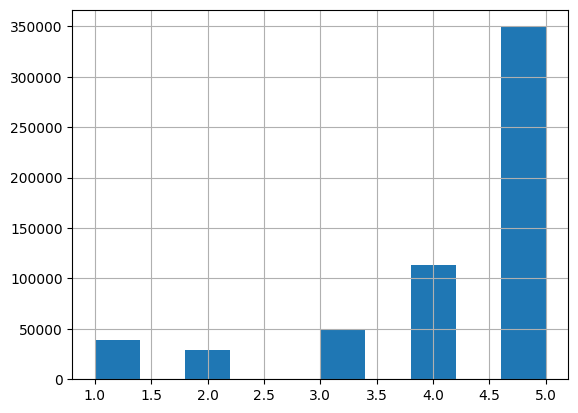

In [37]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [38]:
df_all_data_filtered_processed.isna().sum()

review                0
text                  0
review_year           0
helpfulness_0         0
helpfulness_1         0
authors           12397
publisher         97373
categories        47273
published_year        0
dtype: int64

In [39]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
348488,5.0,J.R.R. Tolkien created the Lord of the Rings b...,2004,0.000000,1.000000,[J. R. R. Tolkien],Houghton Mifflin Harcourt,[Fiction],2013
543860,4.0,"Frankly, I'm a bit shocked that there aren't a...",2000,0.900000,0.900000,[Bernard Rudofsky],Houghton Mifflin Harcourt P,[Architecture],1977
300920,5.0,"In short, I love this book. It gels. It feels ...",2011,1.000000,1.000000,[Jon Krakauer],Anchor,[True Crime],2004
503570,4.0,The analysis of the Siemens Electric Motor Wor...,2000,1.000000,1.000000,"[John K. Shank, Vijay Govindarajan]",Simon and Schuster,[Business & Economics],1993
379706,5.0,THIS BOOK IS THE BEST. IT SHOWS A FAMILY TRAGE...,1997,0.000000,1.000000,[Pope John Paul II],Image,[Biography & Autobiography],1996
50892,5.0,I received this book as a Christmas gift. The ...,2008,0.000000,1.000000,[Nora Roberts],Piatkus Books,[Adoptees],2010
116622,5.0,Fox's translation of the Hebrew brings forth t...,1998,0.833333,0.833333,[Everett Fox],Schocken,[Religion],1997
418498,5.0,"To start off with, THIS BOOK IS AWSOME!!!!! An...",2004,1.000000,1.000000,[J. R. R. Tolkien],Houghton Mifflin Harcourt,[Fiction],2013
68186,5.0,Not much is left to say about Jonathan Franzen...,2003,0.750000,0.750000,[Jonathan Franzen],Macmillan,[Fiction],2001
398134,5.0,"An excellent read. I really liked Deja Dead, b...",1999,0.000000,0.000000,[Kathy Reichs],Simon and Schuster,[Fiction],2015


In [40]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502046 entries, 0 to 502045
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502046 non-null  float64
 1   text            502046 non-null  object 
 2   review_year     502046 non-null  int64  
 3   helpfulness_0   502046 non-null  float64
 4   helpfulness_1   502046 non-null  float64
 5   authors         490973 non-null  object 
 6   publisher       420055 non-null  object 
 7   categories      467215 non-null  object 
 8   published_year  502046 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [41]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
493805,5.0,"After finishing it, I picked it up and re-read...",2006,0.500000,0.500000,[Marilynne Robinson],"Farrar, Straus and Giroux",[Fiction],2020
63952,5.0,I see a compliment to the power of Ayn Rand's ...,2005,0.680000,0.680000,[Ayn Rand],Penguin Modern Classics,[Architects],2007
416923,1.0,"This book is mythologically inaccurate, sexist...",1997,0.000000,0.000000,[Bernard Evslin],Chelsea House,[Juvenile Nonfiction],1987
396327,5.0,This book is good. If you you want to learn ba...,1999,1.000000,1.000000,[Louis Gary Lamit],Pws Publishing Company,[Computers],1998
143998,5.0,This book offers beautiful photography and use...,2007,1.000000,1.000000,[Jacques Kelly],NaN,[Transportation],2003
173498,5.0,If I only had two books to own (other than the...,2013,0.000000,1.000000,[W. Ian Thomas],Zondervan,[Religion],1989
50536,4.0,I have read many of Nancy Drew books and like ...,1999,0.750000,0.750000,[Carolyn Keene],Penguin,[Juvenile Fiction],1940
263946,4.0,Wow. Reading the first 17 reviews of this book...,2006,0.666667,0.666667,"[Robi Ludwig, Matt Birkbeck]",Simon and Schuster,[True Crime],2006
365570,5.0,"Anthony DiDomenico 65 May 14, 1999The book I r...",1999,0.000000,1.000000,[Jerry Spinelli],"Little, Brown Books for Young Readers",[Juvenile Fiction],2014
212534,5.0,Have you ever read a book where you felt like ...,2002,1.000000,1.000000,[Jess Lair],Fawcett Books,[Self-Help],1995


# Initial EDA and Final Preprocesing

## Helpfulness Column

### Removing Outliers

Porcentual helpfulness variable values should be between 0 and 1. Outliers are remove as they are just 2 entries from the entire dataset.

In [42]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502046.000000
mean          0.504319
std           0.429890
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           2.000000
Name: helpfulness_0, dtype: float64

In [43]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502046.000000
mean          0.789840
std           0.317517
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           2.000000
Name: helpfulness_1, dtype: float64

In [44]:
df_all_data_filtered_processed.shape

(502046, 9)

In [45]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2].index)
df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2]['helpfulness_0'].value_counts()

Series([], Name: count, dtype: int64)

In [46]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)

In [47]:
df_all_data_filtered_processed.shape

(502044, 9)

In [48]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502044.000000
mean          0.789835
std           0.317508
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

In [49]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502044.000000
mean          0.504313
std           0.429881
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           1.000000
Name: helpfulness_0, dtype: float64

In [50]:
#Correlation Analysis 
df_all_data_filtered_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.298954,0.067885
helpfulness_1,0.298954,1.000000,0.302753
review,0.067885,0.302753,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. But helpfulness_0 and helpfulness_1 provide the same information. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed. In order to avoid repeated information.

In [51]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_0'], axis=1)

In [52]:
df_all_data_filtered_processed['helpfulness'] = df_all_data_filtered_processed['helpfulness_1']
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_1'], axis=1)
df_all_data_filtered_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
175980,5.0,Este mundo de desorden capitalista--la realida...,2005,[Che Guevara],NaN,[Communism],1965,1.0
384745,5.0,I work in a dental office and I loved this boo...,2004,[Ed Kugler],NaN,[Business & Economics],2002,1.0
449109,5.0,I read this book in three days!! I didn't have...,1998,[Livia Bitton-Jackson],Simon and Schuster,[Young Adult Nonfiction],2011,1.0
495748,5.0,Be warned: Spivak is speaking a different lang...,2010,[Michael Spivak],Hachette UK,[Science],1971,0.7
299613,5.0,To do a bit of research on our Certificate Bas...,2011,"[Tim Speed, Juanita Ellis]",Elsevier,[Computers],2003,1.0


## Authors Column

### Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [53]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [54]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502044 non-null  float64
 1   text            502044 non-null  object 
 2   review_year     502044 non-null  int64  
 3   authors         490971 non-null  object 
 4   publisher       420053 non-null  object 
 5   categories      467213 non-null  object 
 6   published_year  502044 non-null  int64  
 7   helpfulness     502044 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 30.6+ MB


In [55]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [56]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

### Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [57]:
author_counts = df_all_data_filtered_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien         6547
Jane Austen              2857
Charles Dickens          2581
John Steinbeck           2437
J. K. Rowling            2170
                         ... 
Campbell Soup Company       1
Van Dyke Henry              1
Ivan Conrad Karp            1
Joel Anderson               1
Frederic H. Martini         1
Name: count, Length: 89409, dtype: int64

In [58]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien       6547
Jane Austen            2857
Charles Dickens        2581
John Steinbeck         2437
J. K. Rowling          2170
                       ... 
Rob Scrimger              1
Patrick J. Jung           1
Kenichi Sawai             1
James P. Johnston         1
Frederic H. Martini       1
Name: count, Length: 89409, dtype: int64

In [59]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
pareto_threshold

17881

In [60]:
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors

Index(['J. R. R. Tolkien', 'Jane Austen', 'Charles Dickens', 'John Steinbeck',
       'J. K. Rowling', 'Stephen King', 'Robert Jordan', 'Harper Lee',
       'C. S. Lewis', 'Ray Bradbury',
       ...
       'Mary Daly', 'Edward Dolnick', 'Simon Lewis', 'Greg Rossel',
       'Irving Shulman', 'Louis Begley', 'Allen P. Ross', 'Kerstin P. Ouellet',
       'Steven R. Lindsay', 'Brenda Brathwaite'],
      dtype='object', name='authors', length=17881)

In [61]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

17882

After applying Pareto Principle, there are still 17923 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'. In order to keep the feature and analize the predicting power.

In [62]:
authors = df_all_data_filtered_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 595351 entries, 0 to 502043
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
595351 non-null  object
dtypes: object(1)
memory usage: 9.1+ MB


In [63]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 17882


In [64]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 595351


In [65]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other               137978
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [66]:
other_authors_counts = author_counts[10:]
other_authors_counts

authors
Ray Bradbury              1684
Kurt Vonnegut             1652
George Orwell             1649
Agatha Christie           1562
Lois Lowry                1540
                          ... 
Bob Fitrakis                 5
Robert J. Fitrakis           5
Herbert Charles Corben       5
Philip Stehle                5
Mary Herczog                 5
Name: count, Length: 17872, dtype: int64

In [67]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

10

In [68]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               571241
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [69]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [70]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,"[Other, Other]",The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,"[Other, Other]","Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [71]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: remove_repeated_values(x))

In [72]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,[Other],The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,[Other],"Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [73]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               478802
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

## Cateogories Column

### Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [74]:
categories_counts = df_all_data_filtered_processed['categories'].explode().value_counts()
categories_counts

categories
Fiction                         148514
Juvenile Fiction                 38390
Biography & Autobiography        21608
Religion                         19505
History                          18091
                                 ...  
Sales personnel                      1
Musical intervals and scales         1
FOREIGN LANGUAGE STUDY               1
Nuclear submarines                   1
Galveston (Tex.)                     1
Name: count, Length: 6675, dtype: int64

In [75]:
sorted_category_counts = categories_counts.sort_values(ascending=False)
sorted_category_counts

categories
Fiction                        148514
Juvenile Fiction                38390
Biography & Autobiography       21608
Religion                        19505
History                         18091
                                ...  
Congo (Democratic Republic)         1
Alien labor                         1
Nuns                                1
Communalism                         1
Galveston (Tex.)                    1
Name: count, Length: 6675, dtype: int64

In [76]:
pareto_threshold = int(0.2 * len(sorted_category_counts))
pareto_threshold

1335

In [77]:
top_categories = sorted_category_counts.iloc[:pareto_threshold].index
top_categories

Index(['Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion',
       'History', 'Business & Economics', 'Computers', 'Cooking',
       'Social Science', 'Family & Relationships',
       ...
       'Homeric', 'Christian poetry', 'Autobiography',
       'Star Wars: The Roleplaying Game (Game)', 'Strategic planning',
       'African American authors', 'Hindu mathematics', 'Motorcycles',
       'Compulsive behavior', 'Metaphysics'],
      dtype='object', name='categories', length=1335)

In [78]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
                              ...  
Sicilian Vespers                  8
Mental illness                    8
Anthropologists                   8
Great Plague                      8
Attitude (Psychology)             8
Name: count, Length: 1336, dtype: int64

After applying Pareto Principle, there are still 1342 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'. In order to keep the feature and analize the predicting power.

In [79]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 514251 entries, 0 to 502043
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
514251 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [80]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 1336


In [81]:
categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of entries after explode Categories column 514251


In [82]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [83]:
other_categories_counts = categories_counts[10:]
other_categories_counts

categories
Family & Relationships    6126
Self-Help                 6021
Body                      5978
Mind & Spirit             5975
Juvenile Nonfiction       5922
                          ... 
Sicilian Vespers             8
Mental illness               8
Anthropologists              8
Great Plague                 8
Attitude (Psychology)        8
Name: count, Length: 1326, dtype: int64

In [84]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['categories'].explode().unique())

10

In [85]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        232161
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [86]:
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [87]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [88]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        220055
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

## Publisher Column

In [89]:
publisher_counts = df_all_data_filtered_processed['publisher'].value_counts()
publisher_counts

publisher
Penguin                         25291
Simon and Schuster              23284
Harper Collins                  15718
Vintage                          8116
Random House                     7971
                                ...  
Squaredance Fundamentals            1
Pearson Custom Pub                  1
Blooming Twig Books                 1
Oxford : Phaidon, Christie's        1
Src Pub.                            1
Name: count, Length: 10945, dtype: int64

### Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [90]:
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)
sorted_publisher_counts

publisher
Penguin                               25291
Simon and Schuster                    23284
Harper Collins                        15718
Vintage                                8116
Random House                           7971
                                      ...  
Sawday                                    1
Beech Tree Books                          1
Rainbow Morning Music Alternatives        1
Strident Publishing                       1
Src Pub.                                  1
Name: count, Length: 10945, dtype: int64

In [91]:
pareto_threshold = int(0.2 * len(sorted_publisher_counts))
pareto_threshold

2189

In [92]:
top_publishers = sorted_publisher_counts.iloc[:pareto_threshold].index
top_publishers

Index(['Penguin', 'Simon and Schuster', 'Harper Collins', 'Vintage',
       'Random House', 'Macmillan', 'Houghton Mifflin Harcourt', 'Bantam',
       'HarperCollins', 'John Wiley & Sons',
       ...
       'World Scientific Publishing Company', 'Prestel Pub',
       'McSweeneys Books', 'Financial Times/Prentice Hall', 'M J F Books',
       'Laurence King Publishing', 'Marshall Cavendish',
       'Sky Publishing Corporation', 'MDPI', 'I.B. Tauris'],
      dtype='object', name='publisher', length=2189)

In [93]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

After applying Pareto Principle, there are still 2194 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [94]:
publishers = df_all_data_filtered_processed['publisher']
publishers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 502044 entries, 0 to 502043
Series name: publisher
Non-Null Count   Dtype 
--------------   ----- 
502044 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [95]:
print(f'Total of Publishers: {len(publishers.unique())}')

Total of Publishers: 2190


In [96]:
publisher_counts = publishers.value_counts(ascending=False)
publisher_counts

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

In [97]:
top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)
top_10_publishers_counts

publisher
Other                        110339
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [98]:
other_publishers_counts = publisher_counts[10:]
other_publishers_counts

publisher
John Wiley & Sons                   4775
Courier Corporation                 4392
Hachette UK                         4286
Penguin UK                          4092
Ballantine Books                    3522
                                    ... 
Laurence Holt Books Incorporated      14
Phoenix Publishing (WA)               14
Lothian Children's Books              14
Haynes Publishing UK                  14
Berklee PressPublications             14
Name: count, Length: 2180, dtype: int64

In [99]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')
len(df_all_data_filtered_processed['publisher'].unique())

10

In [100]:
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                        400977
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [101]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
123275,5.0,I received a hip injury at work that retired m...,2010,[Other],Other,[Other],1999,1.000000
32211,4.0,I read this book because it was quoted in the ...,2012,[Other],Penguin,[Fiction],2003,1.000000
498320,1.0,At first glance the book seems like a 'neutral...,2011,[Other],Other,[Other],2022,0.368421
205848,1.0,"This was the first book I read by this author,...",2003,[Other],Other,[Fiction],2014,0.500000
250861,5.0,Read this book in under 2 Hours...stopping her...,2011,[Other],Other,[Fiction],2006,1.000000
249851,5.0,This is the book to choose if you would like t...,2012,[Charles Dickens],Other,[Other],2012,1.000000
96316,4.0,This in a very good book about a group of men ...,2002,[Other],Other,[Fiction],2014,1.000000
65730,4.0,"For decades now, San Francisco theatregoers ha...",2005,[Other],Other,[Juvenile Fiction],2018,1.000000
136770,2.0,A Seperate made me think about what really hap...,1999,[Other],Other,[Fiction],2003,1.000000
179317,5.0,Jeff Strong has put together a wonderful book ...,2002,[Other],Other,[Other],2020,1.000000


# Processed Datasets Saving

In [102]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           502044 non-null  int64  
 1   review          502044 non-null  float64
 2   text            502044 non-null  object 
 3   review_year     502044 non-null  int64  
 4   authors         502044 non-null  object 
 5   publisher       502044 non-null  object 
 6   categories      502044 non-null  object 
 7   published_year  502044 non-null  int64  
 8   helpfulness     502044 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 34.5+ MB


In [103]:
#A reduced Dataset is created to process Text Column and Apply sentiment Analysis.
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
46542,46542,"As a reader, this book was shockingly fantasti..."
301125,301125,I first read Dawn's Early Light and the other ...
431568,431568,"As with ""The Tipping Point,"" Malcolm Gladwell ..."
358191,358191,Eric Newby is really one of the greatest and w...
185260,185260,Arthur Miller's return to the stage after a br...
297198,297198,John Cleese does an excellent job as the voice...
70737,70737,The book by David Kenik has a lot of great poi...
26625,26625,"20,000 leagues under the sea is a ok book if y..."
36134,36134,Of all of the books by Jane Austen this was my...
348981,348981,I enjoyed the storyline but not the plot. You ...


In [104]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [105]:
df_reduced.to_csv('../data/processed/df_reduced.csv')